<a href="https://colab.research.google.com/github/mephi82/grad_data_analysis/blob/main/convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 텐서플로 2.0 시작하기: 초보자용

이 문서는 [구글 코랩](https://colab.research.google.com/notebooks/welcome.ipynb)(Colaboratory) 노트북 파일입니다. 파이썬 프로그램을 브라우저에서 직접 실행할 수 있기 때문에 텐서플로를 배우고 사용하기 좋은 도구입니다:

1. 파이썬 런타임(runtime)에 연결하세요: 메뉴 막대의 오른쪽 상단에서 *CONNECT*를 선택하세요.
2. 노트북의 모든 코드 셀(cell)을 실행하세요: *Runtime* > *Run all*을 선택하세요.

더 많은 예제와 자세한 안내는 [텐서플로 튜토리얼](https://www.tensorflow.org/tutorials/)을 참고하세요.

먼저 프로그램에 텐서플로 라이브러리를 임포트합니다:

In [1]:
%config Completer.use_jedi = False
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

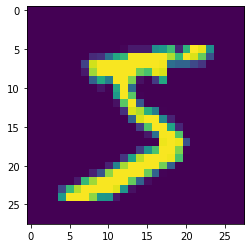

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()


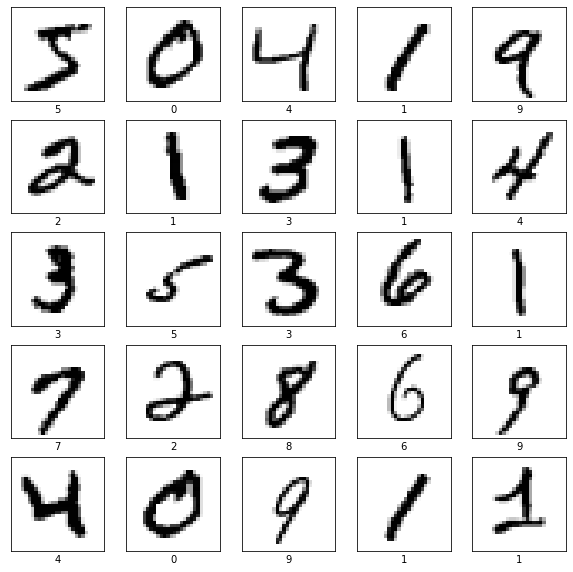

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [6]:
# tf.keras.utils.to_categorical(y_train, 10)
# y_train
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [7]:
import time



model = tf.keras.models.Sequential()
# CONV -> RELU -> POOL
model.add(tf.keras.layers.Conv2D(20, kernel_size=5, padding='same', input_shape = (28,28,1))) #Conv2D의 input shape는 (채널수, 가로, 세로)로 들어감
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(50, kernel_size=5, padding='same')) #2번째 부터는 input shape를 자동으로 맞춰줌
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
st = time.time()
hist = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split= 0.2)
elapsed = time.time() - st


# def model_tune(x_train, y_train, nepoch, LR, batchsize, nlayers, nhidden, DOR):

#   model = tf.keras.models.Sequential()
#   model.add(tf.keras.layers.Flatten(input_shape=(28, 28), name = 'input'))
#   for i in range(nlayers):
#     model.add(tf.keras.layers.Dense(nhidden, activation='relu', name = 'hidden'+str(i)))
#     model.add(tf.keras.layers.Dropout(DOR))
#   model.add(tf.keras.layers.Dense(10, activation='softmax', name = 'output'))

#   print(model.summary())
#   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])
#   st = time.time()
#   hist = model.fit(x_train, y_train, batch_size = batchsize, epochs=nepoch, validation_split= 0.2)
#   return(model, hist, time.time()-st)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0

313/313 [==============================] - 1s 3ms/step - loss: 0.0379 - accuracy: 0.9926


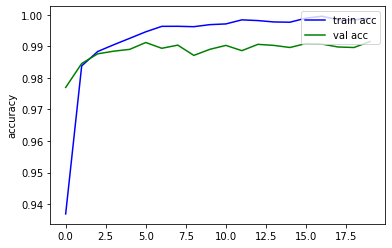

In [8]:
model.evaluate(x_test, y_test)

import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

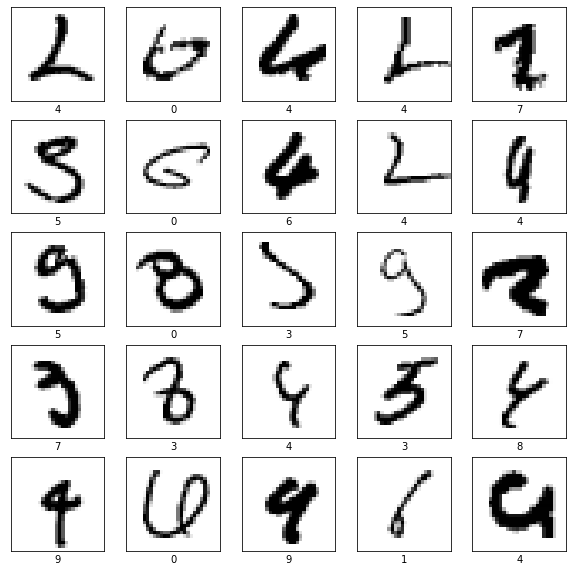

In [9]:
import numpy as np
y_pred = np.argmax(model.predict(x_test), axis=-1)
errors = np.where(y_pred!=y_test)[0]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[errors[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y_pred[errors[i]])
plt.show()

State of the art on MNIST
https://paperswithcode.com/sota/image-classification-on-mnist